In [1]:
from SimpleComparison import SimpleComparison
from hdimvis.algorithms.spring_force_algos.chalmers96_algo.Chalmers96 import Chalmers96
from hdimvis.visualise_layouts_and_metrics.plot import show_layouts,show_generation_metrics
from pathlib import Path
from definitions import PROJECT_ROOT


In [2]:



algo1 = Chalmers96(None, neighbour_set_size=1, sample_set_size=0, use_knnd=True)
algo2 = Chalmers96(None, neighbour_set_size=1, sample_set_size=0, use_knnd=False)

datasets = ['rna N3k']
    # , 'rna N3k', 'airfoil']

algos = {algo2: 'no knnd', algo1: 'with knnd'}
metric_collection = { "Average speed": 1, "Stress": 2}

experiment = SimpleComparison(algos, experiment_name='test experiment',metric_collection_during_layout_creation=metric_collection,
                             dataset_names=datasets, num_repeats=2, iterations=3)



In [3]:
experiment.run()

####################
Fetching the "rna N3k" dataset
####################
Dataset loaded
Dataset shape: (3000, 50)
####################
The algorithm will use a random initialization for the low D embedding/layout
####################
A 2D layout of the "rna N3k" dataset will be created 
using the "Chalmers' 1996 - no knnd" algorithm
####################
The HD distance measure used is: euclidean
####################
"Average speed" will be measured every 1 iterations
####################
"Stress" will be measured every 2 iterations
####################
All stress calculations will be performed using the euclidian norm
####################
Spring constant is set to  1 
Damping constant is set to 1 
####################

 Vectorised euclidean stress 


 Vectorised euclidean stress 


 Vectorised euclidean stress 

####################
A 2D layout of the "rna N3k" dataset will be created 
using the "Chalmers' 1996 - no knnd" algorithm
####################
The HD distance measure used is: 

In [4]:
path =  experiment.pickle(save_to=PROJECT_ROOT.joinpath(Path("experiments/basic_comparison/knnd/out")))

C:\Users\Owner\.virtualenvs\2095736w-0SnFieZ0\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


{'rna N3k': {'no knnd': {'time': [7.019431700002315, 6.965054299998883], 'final stress': [0.8991598402958174, 0.8991598402958174], 'peak memory': [7347595783, 7346899408], 'baseline memory': [3547495, 2850272]}, 'with knnd': {'time': [7.115666199999396, 7.2583672999971895], 'final stress': [1.0051246311727946, 0.9865398309848468], 'peak memory': [7351582695, 7351781546], 'baseline memory': [7533559, 7732356]}}}


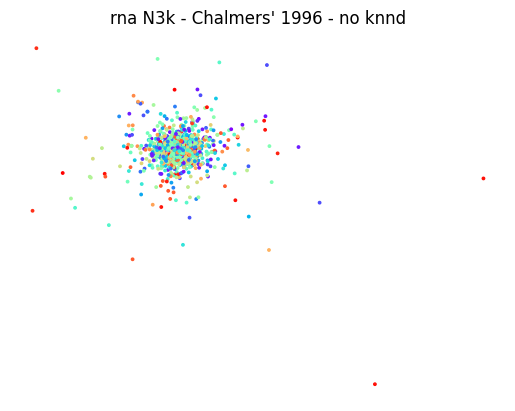

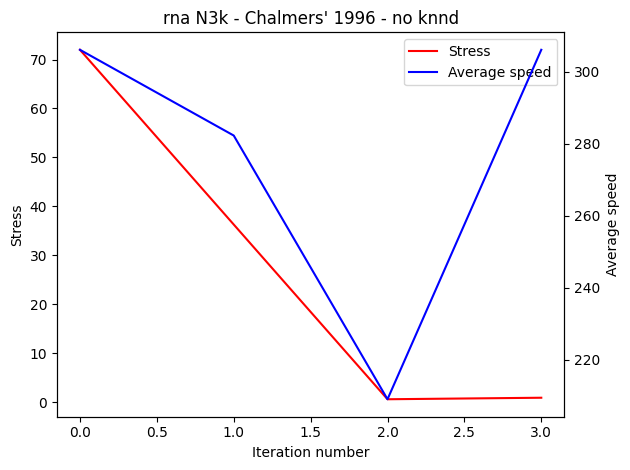

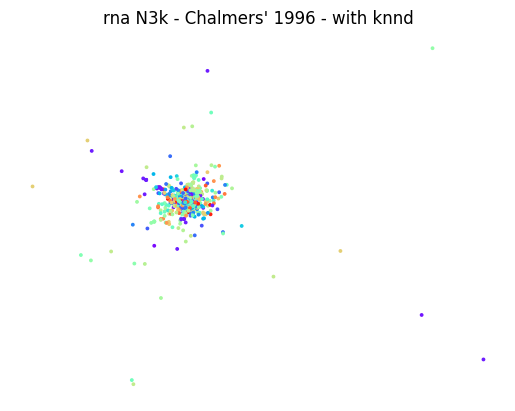

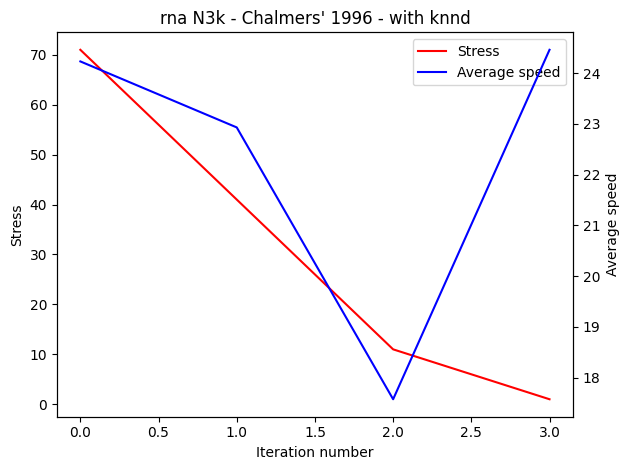

{'Stress': ([0, 2, 3], [71.01151385319685, 10.987389782659028, 0.9865398309848468]), 'Average speed': ([0, 1, 2, 3], [24.230637994434375, 22.929650340982274, 17.571423886248855, 24.459644223461368])}


In [5]:
import pickle


with open(path, 'rb') as file:
     experiment = pickle.load(file)
     file.close()

print(experiment.results)


show_layouts(experiment.layouts['rna N3k']['no knnd'][-1], use_labels=True)
show_generation_metrics(experiment.layouts['rna N3k']['no knnd'][-1], average_speed=True, stress=True)

show_layouts(experiment.layouts['rna N3k']['with knnd'][-1], use_labels=True,)
show_generation_metrics(experiment.layouts['rna N3k']['with knnd'][-1], average_speed=True, stress=True)
print(experiment.layouts['rna N3k']['with knnd'][-1].collected_metrics)